Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import scipy.stats
import matplotlib.pyplot as plt

Read the csv file

In [3]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratingsdf = pd.read_csv(ratings_url)

Display information about the dataset  
1. Structure of the dataframe
2. Describe the dataset
3. Number of rows and columns

Print out the first five rows of the data (Structure of the dataframe)

In [4]:
ratingsdf.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


Get information about each feature of the dataframe (describe dataset)

In [5]:
ratingsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

Number of rows and columns 

In [6]:
ratingsdf.shape

(463, 19)

### Can you identify whether the teachers' Rating data is a time series or cross-sectional?

> Since the dataset do not have a date or time variable, therefore it is not a time series dataset.  
> Since the dataset records more than one teacher being rated, there it is cross sectional dataset.

### Find the mean, median, minimum, and maximum values for students

In [7]:
# mean value
ratingsdf['students'].mean()

36.62419006479482

In [8]:
# median value
ratingsdf['students'].median()

23.0

In [9]:
# maximum value
ratingsdf['students'].max()

380

In [10]:
# min value
ratingsdf['students'].min()

5

## Produce a descriptive statistics table

In [11]:
ratingsdf.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Create a histogram of the beauty variable and briefly comment on the distribution of data

(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <BarContainer object of 10 artists>)

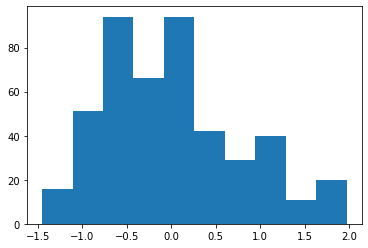

In [12]:
# using matplotlib, create a histogram

plt.hist(ratingsdf['beauty'])

The distribution is skewed to the right. Most of the data is to the left i.e mode is to the left of mean.

_____

### Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

In [13]:
ratingsdf.groupby('gender').agg({'beauty':['mean','std']}).reset_index()

gender    beauty         
               mean      std
0  female  0.116109  0.81781
1    male -0.084482  0.75713

We can see that the mean female beauty score is more than beauty score of men. Also, the dipersion of the beauty score from the mean in females is more than males.

-----

### Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [14]:
# first groupby to get the sum
tenure_count =  ratingsdf[ratingsdf.tenure == 'yes'].groupby('gender').agg({'tenure':'count'}).reset_index()
tenure_count

,gender,tenure
0,female,145
1,male,216


In [15]:
# calculate percentage
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum() 
tenure_count

,gender,tenure,percentage
0,female,145,40.166205
1,male,216,59.833795


------

### Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?


In [16]:
tenure_count = ratingsdf.groupby('minority').agg({'tenure':'count'}).reset_index()
tenure_count['percentage'] = 100*tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894


-----

### Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.


In [17]:
ratingsdf.groupby('tenure').agg({'age':['mean','std']}).reset_index()

tenure        age           
               mean        std
0     no  50.186275   6.946372
1    yes  47.850416  10.420056

___

### Create a histogram for the age variable

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <BarContainer object of 10 artists>)

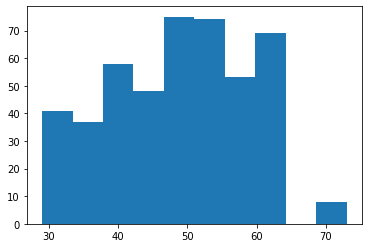

In [18]:
plt.hist(ratingsdf.age)

_____

### Create a bar plot for the gender variable

Text(0.5, 1.0, 'Gender distribution bar plot')

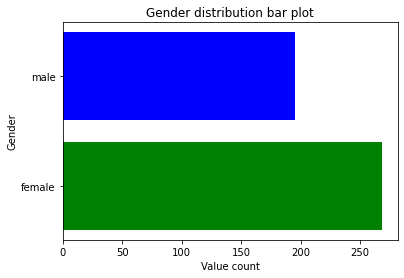

In [19]:
from turtle import color


plt.barh(ratingsdf.gender.unique(), ratingsdf.gender.value_counts(), color=['green','blue'])
plt.xlabel('Value count')
plt.ylabel('Gender')
plt.title('Gender distribution bar plot')

_______

### What is the median evaluation score for tenured professors?

In [20]:
ratingsdf[ratingsdf['tenure']=='yes']['eval'].median()

4.0

___

### Print out the number of unique values in the prof variable

In [21]:
ratingsdf['prof'].nunique()

94

### Using all observations, find the average and standard deviation for age

In [22]:
ratingsdf['age'].mean()

48.365010799136066

In [23]:
ratingsdf['age'].std()

9.802742037864821

### First drop duplicates using prof as a subset and assign it a new dataframe name called no_duplicates_df

In [24]:
no_duplicates_df = ratingsdf.drop_duplicates(subset=['prof'])
no_duplicates_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


### Use the new dataset to get the mean of age

In [25]:
no_duplicates_df['age'].mean()

47.5531914893617

In [26]:
no_duplicates_df['age'].std()

10.25651329515495

_____

### Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.

In [27]:
division_eval = ratingsdf.groupby('division').agg({'eval':'mean'}).reset_index()
division_eval

,division,eval
0,lower,4.087261
1,upper,3.952614


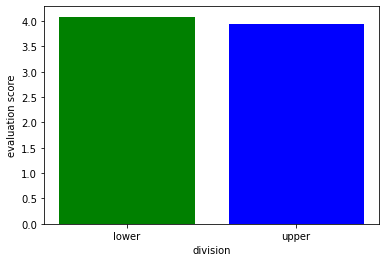

In [28]:
plt.bar(division_eval['division'], division_eval['eval'], color=['green', 'blue'])
plt.xlabel('division')
plt.ylabel('evaluation score')
plt.show()

______

### Plot the relationship between age and teaching evaluation score

Text(0, 0.5, 'eval')

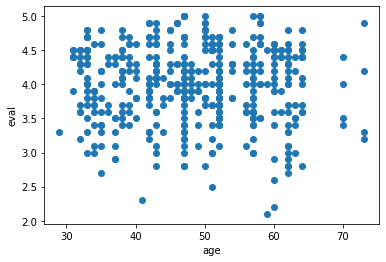

In [29]:
plt.scatter(ratingsdf['age'], ratingsdf['eval'])
plt.xlabel('age')
plt.ylabel('eval')

---

### Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

<AxesSubplot:xlabel='age', ylabel='eval'>

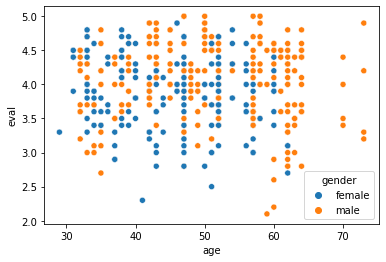

In [30]:
sns.scatterplot(x='age', y='eval', data=ratingsdf, hue='gender')

---

### Create a box plot for beauty scores differentiated by credits

<AxesSubplot:xlabel='beauty', ylabel='credits'>

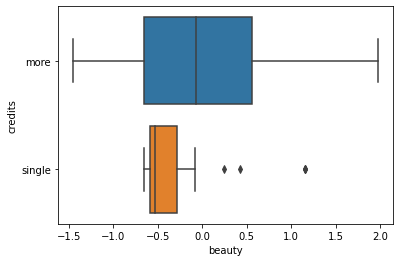

In [31]:
sns.boxplot(x='beauty', data=ratingsdf, y='credits')

---

### What is the number of courses taught by gender?

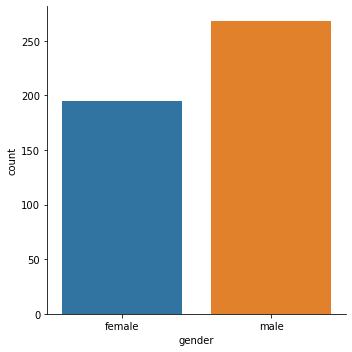

In [32]:
sns.catplot(x='gender', kind='count', data=ratingsdf)

----

### Create a group histogram of taught by gender and tenure

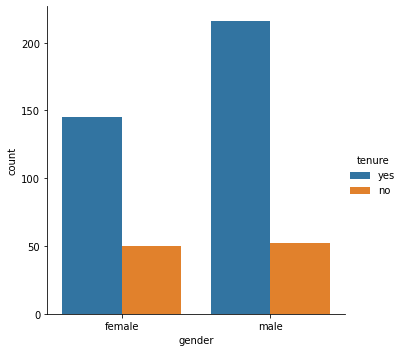

In [33]:
sns.catplot(hue='tenure', data=ratingsdf, x='gender', kind='count')

----

Add division as another factor to the above histogram

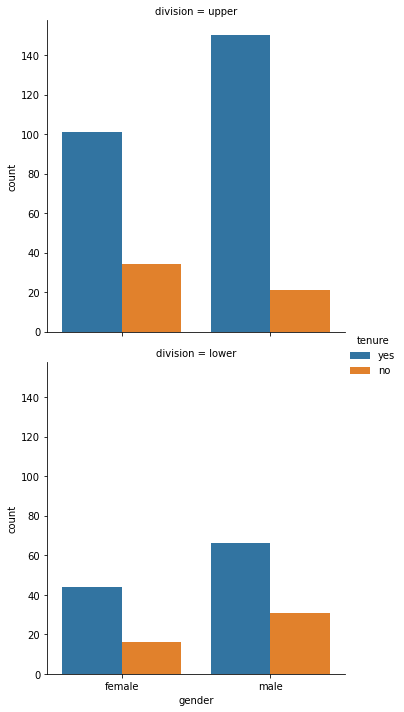

In [34]:
sns.catplot(x='gender', kind='count', hue='tenure', data=ratingsdf, row='division')

---

### Create a scatterplot of age and evaluation scores, differentiated by gender and tenure.

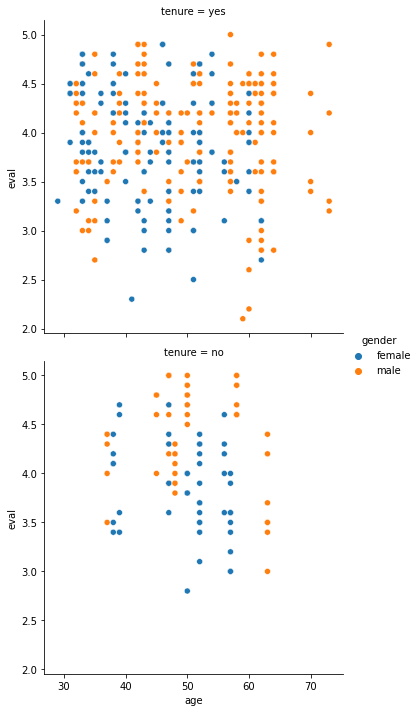

In [35]:
sns.relplot(x='age', y='eval', data=ratingsdf, hue='gender', row='tenure')

-----

### Create a distribution plot of teaching evaluation scores

(array([ 3.,  2., 13., 27., 52., 76., 88., 93., 76., 33.]),
 array([2.0999999 , 2.38999991, 2.67999992, 2.96999993, 3.25999994,
        3.54999995, 3.83999996, 4.12999997, 4.41999998, 4.70999999,
        5.        ]),
 <BarContainer object of 10 artists>)

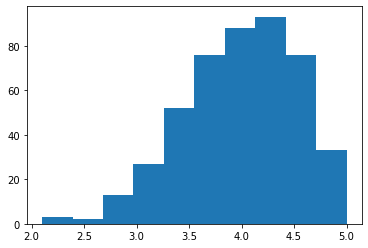

In [36]:
plt.hist(ratingsdf['eval'])

---

### Create a distribution plot of teaching evaluation score with gender as a factor

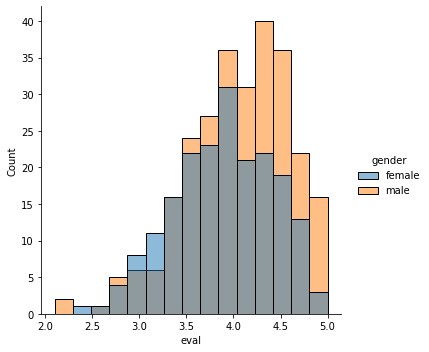

In [37]:
sns.displot(data=ratingsdf, x='eval', hue='gender')

___

### Create a box plot - age of the instructor by gender

<AxesSubplot:xlabel='age', ylabel='gender'>

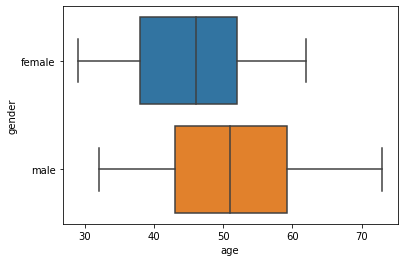

In [38]:
sns.boxplot(data=ratingsdf, x='age', y='gender')

### Compare age along with tenure and gender

<AxesSubplot:xlabel='age', ylabel='gender'>

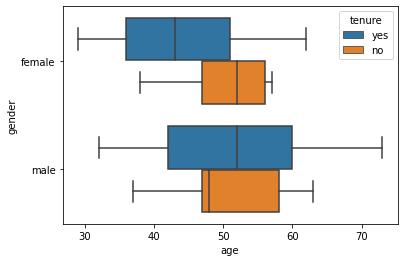

In [39]:
sns.boxplot(data=ratingsdf, x='age', y='gender', hue='tenure')

___

### Create a distribution plot of beauty scores with Native English speaker as a factor. 
Make the colour of native English speakers plot orange and non native English speakers blue

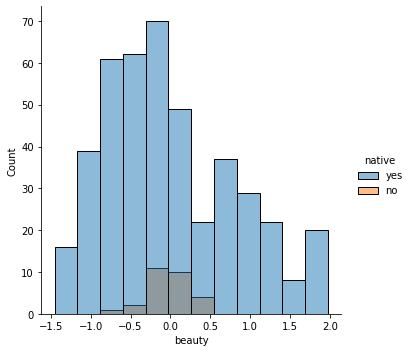

In [40]:
sns.displot(data=ratingsdf, x='beauty', hue='native')

### Create a horizontal box plot of the age of the instructors by the visible minority

<AxesSubplot:xlabel='age', ylabel='minority'>

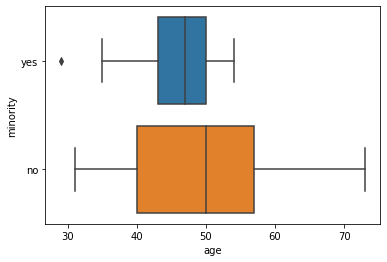

In [41]:
sns.boxplot(x='age', y='minority', data=ratingsdf)

### Create a group histogram of tenure by minority and add the gender factor

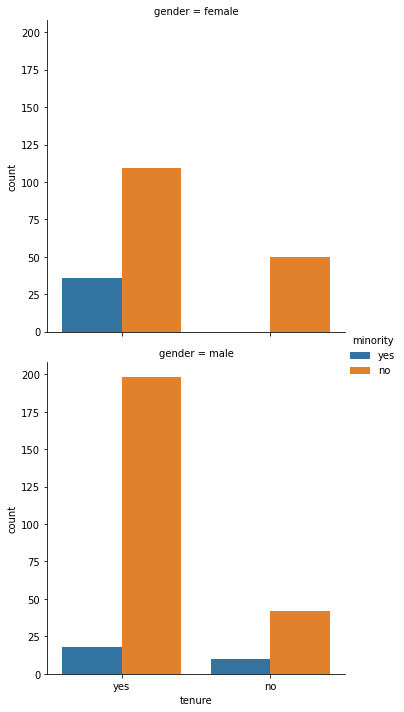

In [42]:
from turtle import title


sns.catplot(data=ratingsdf, x='tenure', kind='count', hue='minority', row='gender')

### Create a boxplot of the age variable

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

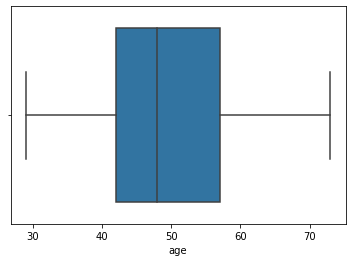

In [43]:
sns.boxplot(ratingsdf['age'])

___

# Probability distribution

### What is the probability of receiving an evaluation score of greater than 3.3?

In [44]:
eval_mean = round(ratingsdf['eval'].mean(),3)
eval_std = round(ratingsdf['eval'].std(),3)
prob_less_than = scipy.stats.norm.cdf((3.3-eval_mean)/eval_std)
prob_less_than
print(1-prob_less_than)

0.8957422041794154


### What is the probability of receiving an evaluation score between 2 and 3?

In [45]:
prob_less_than_2 = scipy.stats.norm.cdf((2-eval_mean)/eval_std)
prob_less_than_3 = scipy.stats.norm.cdf((3-eval_mean)/eval_std)
print(prob_less_than_3-prob_less_than_2)

0.03591369391246606


________

# Hypothesis testing

### Does gender affect teaching evaluation rates?

State the hypothesis:  
* H_0 : u1=u2 (there is no difference in evaluation scores between male and female)
* H_1 : u1 =/= u2 (there is a difference in evaluation scores between males and females)

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

*   One independent, categorical variable with two levels or group
*   One dependent continuous variable
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance

<AxesSubplot:xlabel='eval', ylabel='Count'>

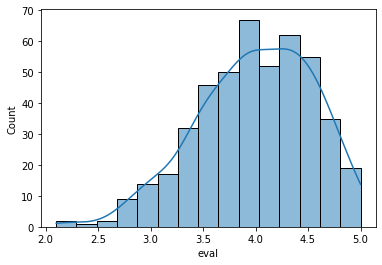

In [47]:
# plot the dependent variable with a histogram
sns.histplot(ratingsdf['eval'], kde=True)

In [51]:
# Levene's test to check equality of variance
scipy.stats.levene(ratingsdf[ratingsdf['gender']=='female']['eval'], ratingsdf[ratingsdf['gender']=='male']['eval'], center='mean')

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

Since, the value of p is more than 0.05, we can assume equality of variance.

In [50]:
scipy.stats.ttest_ind(ratingsdf[ratingsdf['gender']=='female']['eval'], ratingsdf[ratingsdf['gender']=='male']['eval'], equal_var=True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

**Conclusion** : Since the p-value is less than the alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender